# Layer Titanic Example

https://github.com/layerml/examples/tree/main/titanic

A classification example with `sklearn.RandomForestClassifier` for predicting the survivals of the Titanic passengers. We will be using the famous [Kaggle Titanic dataset](https://www.kaggle.com/c/titanic/data?select=train.csv).

In [5]:
import layer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You should have a Layer account by now, you can login with:
layer.login()

# 1. Explore the Data Catalog
Layer provides a central repository for your Datasets and Featuresets so that they can be systematically built, monitored, and evaluated to reduce the cost of errors. Layer Data Catalog with data management, monitoring and search tools, helps data team members to find the data that they need, serves as an repository of available data. Now, let's take a look at the Datasets and the Features we have used/created in the [Titanic Project](https://github.com/layerml/examples/tree/main/titanic)

## a. Analyze the Datasets
A dataset is a reference of your data in an external data source. You can add a database table or a CSV in a cloud file storage as a dataset to the Layer Data Catalog. Titanic dataset is the source data which contains the passenger information. This dataset is introduced in the Layer Data Catalog with this [file](https://github.com/layerml/examples/blob/main/titanic/data/titanic_data/dataset.yaml). Now, let's fetch it from the Layer DataCatalog and analyze it. We can fetch the dataset as a `pandas` or `spark` dataframe.

In [11]:
dataset = layer.get_dataset("titanic")
df = dataset.to_pandas()
df.head()

,SURVIVED,PASSENGERID,EMBARKED,NAME,AGE,SEX,FARE,PARCH,CABIN,TICKET,PCLASS,SIBSP
0,0,1,S,"Braund, Mr. Owen Harris",22.0,male,7.2500,0,None,A/5 21171,3,1
1,1,2,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,71.2833,0,C85,PC 17599,1,1
2,1,3,S,"Heikkinen, Miss. Laina",26.0,female,7.9250,0,None,STON/O2. 3101282,3,0
3,1,4,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,53.1000,0,C123,113803,1,1
4,0,5,S,"Allen, Mr. William Henry",35.0,male,8.0500,0,None,373450,3,0


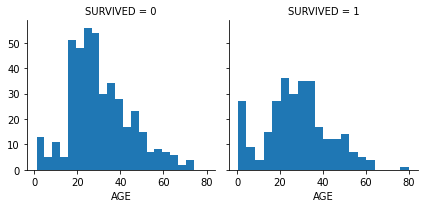

In [12]:
g = sns.FacetGrid(df, col='SURVIVED')
g.map(plt.hist, 'AGE', bins=20)

## b. Analyze the Calculated Features
A featureset is a group of calculated features which provide a high-level interface to access individual features. Featuresets are different from static datasets or ordinary database tables as they provide the capability to time-travel to get point-in-time values of its underlying features. We can also fetch the calculated features from Layer Data Catalog. For example, `passenger_features` is a group of features which passenger features calculated by Layer.

In [13]:
pf = layer.get_featureset("passenger_features").to_spark()
pf.show()

21/08/12 12:45:24 WARN Utils: Your hostname, MacBook-Pro-3.local resolves to a loopback address: 127.0.0.1; using 192.168.1.47 instead (on interface en0)
21/08/12 12:45:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/08/12 12:45:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/08/12 12:45:37 WARN SizeEstimator: Failed to check whether UseCompressedOops is set; assuming yes
21/08/12 12:45:38 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(scavenge), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
21/08/12 12:45:38 WARN GarbageCollectionMet

+-----------+-------+------------+--------+-------+---+--------+-----+
|PassengerId|AgeBand|EmbarkStatus|FareBand|IsAlone|Sex|Survived|Title|
+-----------+-------+------------+--------+-------+---+--------+-----+
|          1|      1|           0|       0|      0|  0|       0|    1|
|          2|      2|           1|       3|      0|  1|       1|    3|
|          3|      1|           0|       1|      1|  1|       1|    2|
|          4|      2|           0|       3|      0|  1|       1|    3|
|          5|      2|           0|       1|      1|  0|       0|    1|
|          6|      1|           2|       1|      1|  0|       0|    1|
|          7|      3|           0|       3|      1|  0|       0|    1|
|          8|      0|           0|       2|      0|  0|       0|    4|
|          9|      1|           0|       1|      0|  1|       1|    3|
|         10|      0|           1|       2|      0|  1|       1|    3|
|         11|      0|           0|       2|      0|  1|       1|    2|
|     

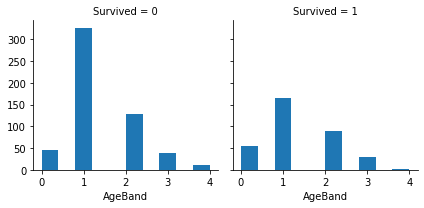

In [15]:
pdf = pf.toPandas()
g = sns.FacetGrid(pdf, col='Survived')
g.map(plt.hist, 'AgeBand')

## 3. Explore the Model Catalog
Layer Model Catalog provides a centralized, managed, indexed storage space for ML Models. It ensures that model artifacts are versioned and immutable. This allows data teams to manage and monitor the lifecycle of the ML Models at scale. The models we have trained within the Titanic Project is registered into the Layer Model Catalog. Now let's fetch the survival_model model and do some predictions.

In [38]:
model = layer.get_model("survival_model")
print(model.parameters)
print(model.metrics)

{'test_size': '0.25', 'n_estimators': '50'}
{'accuracy': [(1628764431121, 0.7623318385650224)]}


## a. Let's make a prediction!
By fetching the trained ML model, we can make an adhoc prediction

In [27]:
trained_classifier = model.get_train()
trained_classifier

RandomForestClassifier(n_estimators=50)

In [37]:
trained_classifier.predict([[2,2,1,2,1,0]])

array([0])

In [36]:
!curl --header "Content-Type: application/json; format=pandas-records" \
  --request POST \
  --data '[[2,2,1,2,1,0]]' \
  https://3ebe215f-2bd4-40f6-adf5-0c3839882bbf.inferences.development.layer.co/invocations

[0]